In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Считывание данных из файла
df = pd.read_csv('data.csv', decimal=',')
X = df['X'].to_numpy()
Y = df['Y'].to_numpy()
df.head()

,X,Y
0,8.50,17.76
1,3.61,9.47
2,11.22,22.25
3,16.38,27.00
4,15.99,23.06


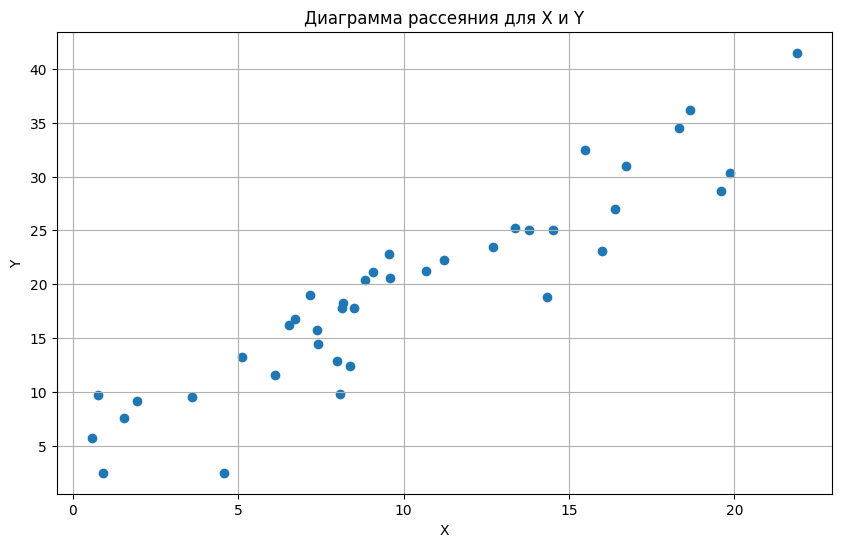

In [ ]:
# Отображение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.title('Диаграмма рассеяния для X и Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

Нахождение вектора оценок параметров регрессии:
$$
\hat{B} = K^{-1}Z,
$$

где:

$$
K = X^TX, \quad Z = X^TY,
$$

$$
X =
\begin{pmatrix}
1 & x_1^{(1)} & \cdots & x_k^{(1)} \\
1 & x_1^{(2)} & \cdots & x_k^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & \cdots & x_k^{(n)}
\end{pmatrix}
=
\begin{pmatrix}
1 & \varphi_1(x_1) & \cdots & \varphi_k(x_1) \\
1 & \varphi_1(x_2) & \cdots & \varphi_k(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
1 & \varphi_1(x_n) & \cdots & \varphi_k(x_n)
\end{pmatrix}, \quad
Y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$

In [ ]:
# Функция для нахождения оценки параметров уравнения линейной регрессии
def linear_reg_params(X, Y):
  n = len(X)
  X_lin = np.ones((n, 2))
  for i in range(n):
    X_lin[i][1] = X[i]
  K_lin = X_lin.T @ X_lin
  Z_lin = X_lin.T @ Y
  res = np.linalg.inv(K_lin) @ Z_lin
  return res, K_lin

B_lin, K_lin = linear_reg_params(X, Y) # Вектор оценок параметров уравнения линейной регрессии
print(f'Уравнение линейной регрессии имеет вид: y = {round(B_lin[1], 2)}*x + {round(B_lin[0], 2)}')

Уравнение линейной регрессии имеет вид: y = 1.49*x + 4.43


$$
\text{Оценка остаточной дисперсии модели регрессии (несмещенная оценка дисперсии } \sigma^2\text{):}
$$

$$
s^2 = \frac{1}{n - k - 1} \sum_{i=1}^n (y_i - \hat{y}(x_i))^2
$$

$$
\text{Оценка коэффициента детерминации:}
$$

$$
\hat{R}^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

In [ ]:
# Оценка остаточной дисперсии модели линейной регрессии
est_res_var_lin = sum([(Y[i] - (B_lin[1]*X[i] + B_lin[0]))**2 for i in range(len(Y))])/(len(Y)-2)

# Оценка коэффициента детерминации
est_coef_det_lin = 1 - sum([(Y[i] - (B_lin[1]*X[i] + B_lin[0]))**2 for i in range(len(Y))])/sum([(Y[i] - sum(Y)/len(Y))**2 for i in range(len(Y))])

print(f'Оценка остаточной дисперсии модели линейной регрессии: {est_res_var_lin}')
print(f'Оценка коэффициента детерминации: {est_coef_det_lin}')

Оценка остаточной дисперсии модели линейной регрессии: 11.931328036399544
Оценка коэффициента детерминации: 0.8611144385515563


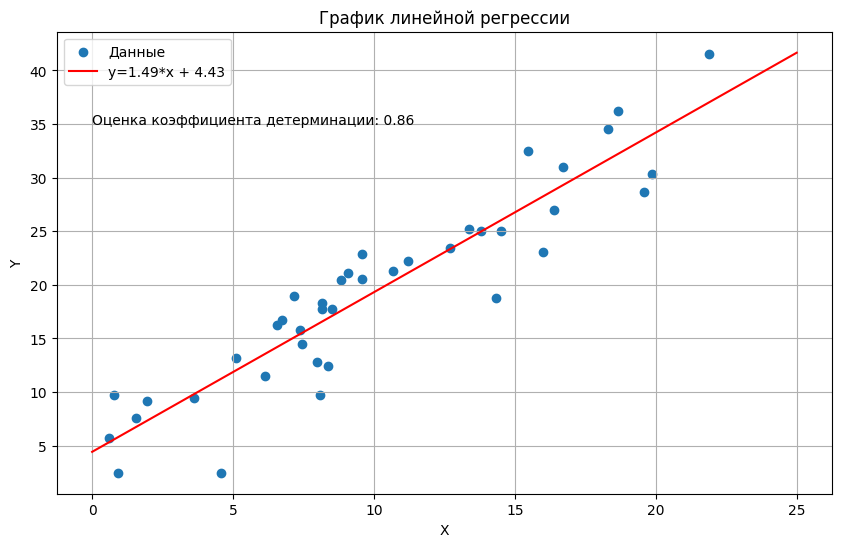

In [ ]:
# Изображение данных на графике
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Данные')
plt.title('График линейной регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# Построение прямой линейной регрессии на графике
x = np.linspace(0, 25)
y_line = B_lin[1]*x + B_lin[0]
plt.plot(x, y_line, 'r-', label=f'y={round(B_lin[1], 2)}*x + {round(B_lin[0], 2)}')
plt.text(0, 35, f'Оценка коэффициента детерминации: {round(est_coef_det_lin, 2)}', fontsize=10)
plt.legend()

Cтатистика Фишера:
$$
F = \frac{n - k - 1}{k} \frac{\sum_{i=1}^{n} (\hat{y}(x_i) - \bar{y})^2}{\sum_{i=1}^{n} (\hat{y}(x_i) - y_i)^2} = \frac{n - k - 1}{k} \frac{\hat{R}^2}{1 - \hat{R}^2}
$$

In [ ]:
F_lin = ((len(Y)-2)/1)*(est_coef_det_lin**2/(1-est_coef_det_lin**2))
F_lin

np.float64(109.01221444580347)

$$
\text{При } \alpha = 0.05
$$

$$
F_{\text{крит}} = 4{,}098171731
$$

$$
\text{Значение статистики Фишера для линейной регрессии больше } F_{\text{крит}}
$$

$$
\text{=> Коэффициент детерминации является значимым}
$$

$$
\text{Для линейной модели значимость коэффициента детерминации равносильна значимости } \beta_{1} \text{.}
$$

$$
\text{Соответственно, проверка значимости оценок параметров линейной модели избыточна.}
$$

In [ ]:
# Функция для нахождения оценки параметров уравнения квадратичной регрессии
def square_reg_params(X, Y):
  n = len(X)
  X_lin = np.ones((n, 3))
  for i in range(n):
    X_lin[i][1] = X[i]
    X_lin[i][2] = (X[i])**2
  K = X_lin.T @ X_lin
  Z = X_lin.T @ Y
  res = np.linalg.inv(K) @ Z
  return res, K

B_square, K_square = square_reg_params(X, Y) # Вектор оценок параметров уравнения квадратичной регрессии
print(f'Уравнение квадратичной регрессии имеет вид: y = {round(B_square[2], 5)}*x^2 + {round(B_square[1], 5)}*x + {round(B_square[0], 5)}')

Уравнение квадратичной регрессии имеет вид: y = 0.00439*x^2 + 1.39516*x + 4.78635


In [ ]:
# Оценка остаточной дисперсии модели квадратичной регрессии
est_res_var_square = sum([(Y[i] - (B_square[2]*(X[i])**2 + B_square[1]*X[i] + B_square[0]))**2 for i in range(len(Y))])/(len(Y)-3)

# Оценка коэффициента детерминации
est_coef_det_square = 1 - sum([(Y[i] - (B_square[2]*(X[i])**2 + B_square[1]*X[i] + B_square[0]))**2 for i in range(len(Y))])/sum([(Y[i] - sum(Y)/len(Y))**2 for i in range(len(Y))])

print(f'Оценка остаточной дисперсии модели квадратичной регрессии: {est_res_var_square}')
print(f'Оценка коэффициента детерминации: {est_coef_det_square}')

Оценка остаточной дисперсии модели квадратичной регрессии: 12.228879490720038
Оценка коэффициента детерминации: 0.8613968484688181


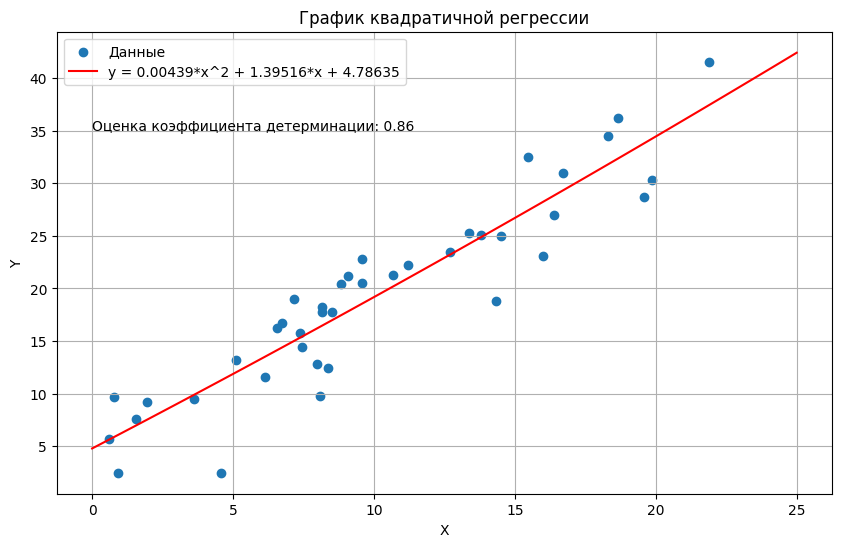

In [ ]:
# Изображение данных на графике
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Данные')
plt.title('График квадратичной регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# Построение кривой квадратичной регрессии на графике
x = np.linspace(0, 25)
y_line = B_square[2]*x**2 + B_square[1]*x + B_square[0]
plt.plot(x, y_line, 'r-', label=f'y = {round(B_square[2], 5)}*x^2 + {round(B_square[1], 5)}*x + {round(B_square[0], 5)}')
plt.text(0, 35, f'Оценка коэффициента детерминации: {round(est_coef_det_square, 2)}', fontsize=10)
plt.legend()

In [ ]:
F_square = ((len(Y)-3)/2)*(est_coef_det_square**2/(1-est_coef_det_square**2))
F_square

np.float64(53.206685546001864)

$$
\text{При } \alpha = 0.05
$$

$$
F_{\text{крит}} = 3{,}251923846
$$

$$
\text{Значение статистики Фишера для квадратичной регрессии больше } F_{\text{крит}}
$$

$$
\text{=> Коэффициент детерминации является значимым}
$$

Статистика Стьюдента

Для проверки значимости коэффициентов $\beta_j, j = 1, k$:

$t_j = \frac{\hat{\beta}_j}{\sqrt{s^2 [K^{-1}]_{jj}}}$, где $[K^{-1}]_{jj}$ - соответствующий диагональный элемент матрицы $K^{-1}$.

In [ ]:
# Проверка значимости оценок параметров
# Оценка beta_2
t_2 = B_square[2]/(est_res_var_square*(np.linalg.inv(K_square)[2][2]))**0.5
t_2

np.float64(0.27457075705889555)

$$
\text{При } \alpha = 0.05
$$

$$
\tau_{0,975} = 2{,}026192463
$$

$$
t_{2} = 0{,}27 < \tau_{0,975}
$$

$$
\text{ => по критерию Cтьюдента принимается нулевая гипотеза, коэффициент } \beta_{2} \text{ не значим.}
$$
$$
\text{Таким образом, квадратичная модель сводится к линейной.}
$$

In [ ]:
# Функция для нахождения оценки параметров уравнения кубической регрессии
def cube_reg_params(X, Y):
  n = len(X)
  X_lin = np.ones((n, 4))
  for i in range(n):
    X_lin[i][1] = X[i]
    X_lin[i][2] = (X[i])**2
    X_lin[i][3] = (X[i])**3
  K = X_lin.T @ X_lin
  Z = X_lin.T @ Y
  res = np.linalg.inv(K) @ Z
  return res, K

B_cube, K_cube = cube_reg_params(X, Y) # Вектор оценок параметров уравнения кубической регрессии
print(f'Уравнение кубической регрессии имеет вид: y = {round(B_cube[3], 5)}*x^3 + {round(B_cube[2], 5)}*x^2 + {round(B_cube[1], 5)}*x + {round(B_cube[0], 5)}')

Уравнение кубической регрессии имеет вид: y = 0.00087*x^3 + -0.02306*x^2 + 1.62102*x + 4.39902


In [ ]:
# Оценка остаточной дисперсии модели кубической регрессии
est_res_var_cube = sum([(Y[i] - (B_cube[3]*(X[i])**3 + B_cube[2]*(X[i])**2 + B_cube[1]*X[i] + B_cube[0]))**2 for i in range(len(Y))])/(len(Y)-4)

# Оценка коэффициента детерминации
est_coef_det_cube = 1 - sum([(Y[i] - (B_cube[3]*(X[i])**3 + B_cube[2]*(X[i])**2 + B_cube[1]*X[i] + B_cube[0]))**2 for i in range(len(Y))])/sum([(Y[i] - sum(Y)/len(Y))**2 for i in range(len(Y))])

print(f'Оценка остаточной дисперсии модели кубической регрессии: {est_res_var_cube}')
print(f'Оценка коэффициента детерминации: {est_coef_det_cube}')

Оценка остаточной дисперсии модели кубической регрессии: 12.535664278343962
Оценка коэффициента детерминации: 0.8617597312762175


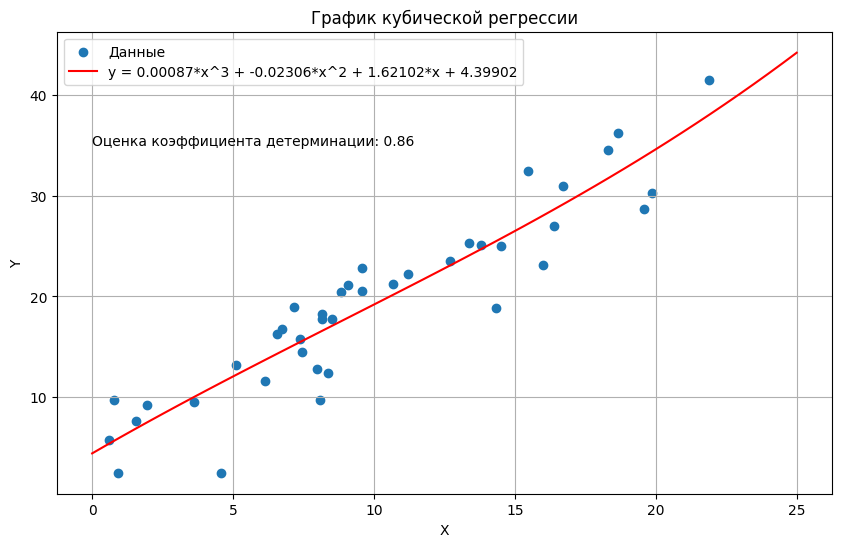

In [ ]:
# Изображение данных на графике
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Данные')
plt.title('График кубической регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# Построение кривой кубической регрессии на графике
x = np.linspace(0, 25)
y_line = B_cube[3]*x**3 + B_cube[2]*x**2 + B_cube[1]*x + B_cube[0]
plt.plot(x, y_line, 'r-', label=f'y = {round(B_cube[3], 5)}*x^3 + {round(B_cube[2], 5)}*x^2 + {round(B_cube[1], 5)}*x + {round(B_cube[0], 5)}')
plt.text(0, 35, f'Оценка коэффициента детерминации: {round(est_coef_det_cube, 2)}', fontsize=10)
plt.legend()

In [ ]:
F_cube = ((len(Y)-4)/3)*(est_coef_det_cube**2/(1-est_coef_det_cube**2))
F_cube

np.float64(34.62545083390469)

$$
\text{При } \alpha = 0.05
$$

$$
F_{\text{крит}} = 2{,}866265551
$$

$$
\text{Значение статистики Фишера для квадратичной регрессии больше } F_{\text{крит}}
$$

$$
\text{=> Коэффициент детерминации является значимым}
$$

In [ ]:
# Проверка значимости оценок параметров
# Оценка beta_3
t_3 = B_cube[3]/(est_res_var_cube*(np.linalg.inv(K_cube)[3][3]))**0.5
t_3

np.float64(0.3074094133150918)

$$
\text{При } \alpha = 0.05
$$

$$
\tau_{0,975} = 2{,}028094001
$$

$$
t_{3} = 0{,}3 < \tau_{0,975}
$$

$$
\text{ => по критерию Cтьюдента принимается нулевая гипотеза, коэффициент } \beta_{3} \text{ не значим.}
$$
$$
\text{Таким образом, кубическая модель сводится к квадратичной.}
$$

In [ ]:
# Функция для нахождения оценки параметров уравнения логарифмической регрессии
def ln_reg_params(X, Y):
  n = len(X)
  X_lin = np.ones((n, 2))
  for i in range(n):
    X_lin[i][1] = np.log(X[i])
  K_lin = X_lin.T @ X_lin
  Z_lin = X_lin.T @ Y
  res = np.linalg.inv(K_lin) @ Z_lin
  return res

B_ln = ln_reg_params(X, Y) # Вектор оценок параметров уравнения логарифмической регрессии
print(f'Уравнение линейной регрессии имеет вид: y = {round(B_ln[1], 2)}*ln(x) + {round(B_ln[0], 2)}')

Уравнение линейной регрессии имеет вид: y = 8.41*ln(x) + 2.16


In [ ]:
# Оценка остаточной дисперсии модели логарифмической регрессии
est_res_var_ln = sum([(Y[i] - (B_ln[1]*np.log(X[i]) + B_ln[0]))**2 for i in range(len(Y))])/(len(Y)-2)

# Оценка коэффициента детерминации
est_coef_det_ln = 1 - sum([(Y[i] - (B_ln[1]*np.log(X[i]) + B_ln[0]))**2 for i in range(len(Y))])/sum([(Y[i] - sum(Y)/len(Y))**2 for i in range(len(Y))])

print(f'Оценка остаточной дисперсии модели логарифмической регрессии: {est_res_var_ln}')
print(f'Оценка коэффициента детерминации: {est_coef_det_ln}')

Оценка остаточной дисперсии модели логарифмической регрессии: 28.80330177636211
Оценка коэффициента детерминации: 0.6647177307861385


<ipython-input-22-95eafdcce838>:10: RuntimeWarning: divide by zero encountered in log
  y_line = B_ln[1]*np.log(x) + B_ln[0]


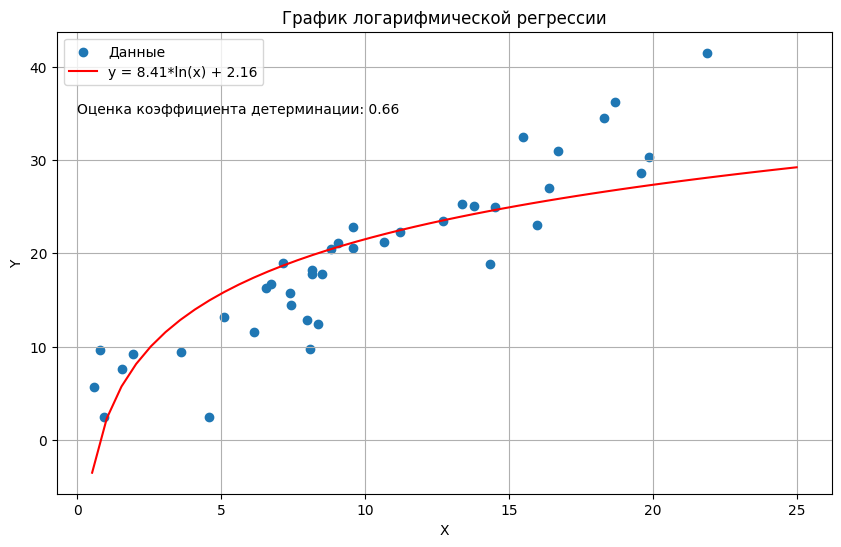

In [ ]:
# Изображение данных на графике
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Данные')
plt.title('График логарифмической регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# Построение кривой логарифмической регрессии на графике
x = np.linspace(0, 25)
y_line = B_ln[1]*np.log(x) + B_ln[0]
plt.plot(x, y_line, 'r-', label=f'y = {round(B_ln[1], 2)}*ln(x) + {round(B_ln[0], 2)}')
plt.text(0, 35, f'Оценка коэффициента детерминации: {round(est_coef_det_ln, 2)}', fontsize=10)
plt.legend()

In [ ]:
F_ln = ((len(Y)-2)/1)*(est_coef_det_ln**2/(1-est_coef_det_ln**2))
F_ln

np.float64(30.082015520035643)

$$
\text{При } \alpha = 0.05
$$

$$
F_{\text{крит}} = 4{,}098171731
$$

$$
\text{Значение статистики Фишера для линейной регрессии больше } F_{\text{крит}}
$$

$$
\text{=> Коэффициент детерминации является значимым}
$$

$$
\text{Для логарифмической модели значимость коэффициента детерминации равносильна значимости } \beta_{1} \text{.}
$$

$$
\text{Соответственно, проверка значимости оценок параметров логарифмической модели избыточна.}
$$

Доверительный интервал для $f(x)$ (среднего $Y$) в точке $x$ уровня $\beta = 1 - \alpha$:

$(\hat{y}(x) - \delta(x); \hat{y}(x) + \delta(x))$, где

$\delta(x) = \tau_{1-\alpha/2} \sqrt{s^2 \phi^T(x) K^{-1} \phi(x)}$,

и $\tau_{1-\alpha/2}$ - квантиль Стьюдента уровня $1-\alpha/2$ с $n-k-1$ степенями свободы.

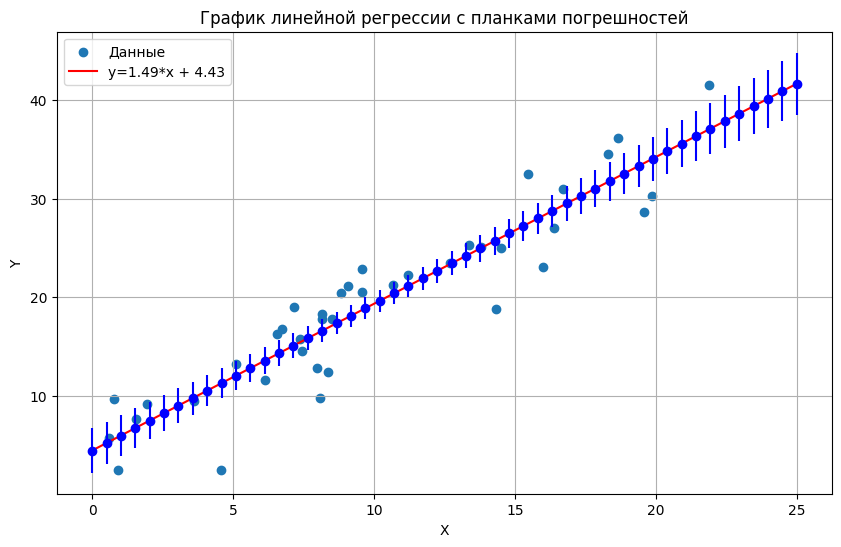

In [ ]:
# Нахождение границ доверительного интервала уровня 0,95 для линии линейной регрессии в точке x
def conf_int(x):
  tau = 2.0244
  phi_vec = np.array([1, x])
  delta = tau*(est_res_var_lin*(phi_vec.T @ np.linalg.inv(K_lin) @ phi_vec))**0.5
  return delta

# Изображение данных на графике
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Данные')
plt.title('График линейной регрессии с планками погрешностей')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# Построение прямой линейной регрессии с планками погрешностей на графике
x = np.linspace(0, 25)
y_line = B_lin[1]*x + B_lin[0]
plt.plot(x, y_line, 'r-', label=f'y={round(B_lin[1], 2)}*x + {round(B_lin[0], 2)}')
plt.errorbar(x, y_line, yerr=[conf_int(arg) for arg in x], fmt='o', color='blue')
plt.legend()

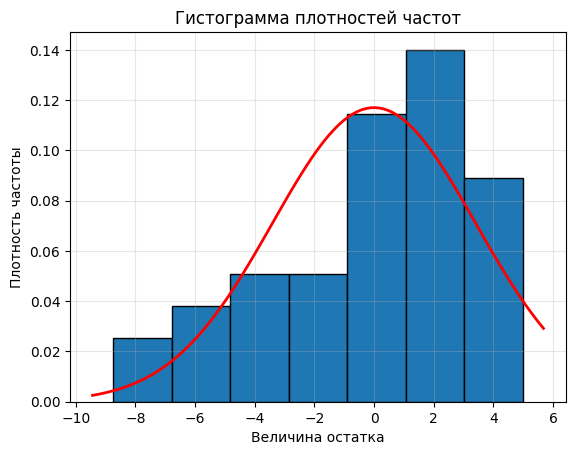

In [ ]:
# Исследование свойств остатков модели линейной регрессии
residuals_vec = [(Y[i] - (B_lin[1]*X[i] + B_lin[0])) for i in range(len(Y))]

# Найдем оценки параметров нормального распределения
res_mean = sum(residuals_vec)/len(residuals_vec)
res_disp = sum([(residuals_vec[i] - res_mean)**2 for i in range(len(residuals_vec))])/(len(residuals_vec)-1)

# Построение гистограммы
plt.hist(residuals_vec, bins=int(2 + np.log2(len(residuals_vec))), density=True, edgecolor='black')
plt.title('Гистограмма плотностей частот')
plt.xlabel('Величина остатка')
plt.ylabel('Плотность частоты')
plt.grid(True, alpha=0.3)

# Наложение графика плотности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, res_mean, res_disp**0.5)
plt.plot(x, p, 'r', linewidth=2)

Визуально гистограмма остатков хорошо согласуется с кривой плотности нормального распределения.

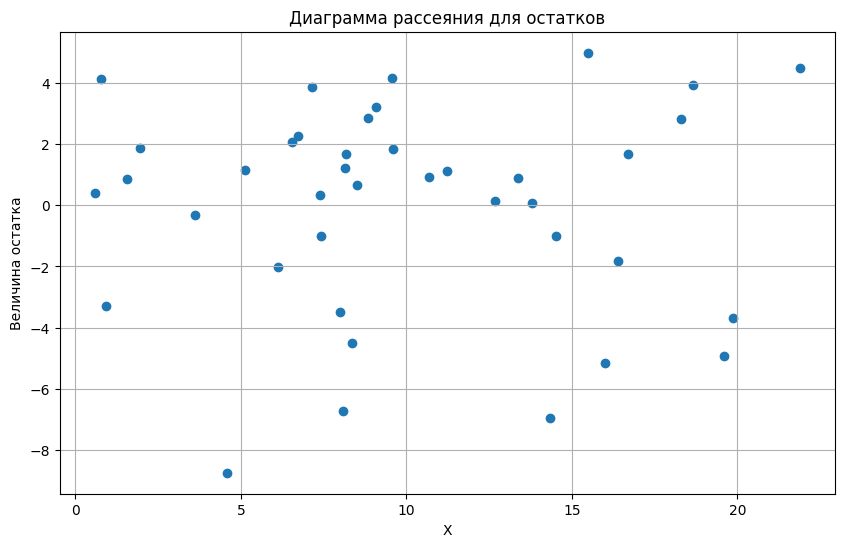

In [ ]:
# Исследование однородности остатков (гомоскедастичности)
# Отображение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals_vec)
plt.title('Диаграмма рассеяния для остатков')
plt.xlabel('X')
plt.ylabel('Величина остатка')
plt.grid(True)

Из приведенной диаграммы можно сделать вывод о достаточной однородности разброса остатков относительно значений переменной x, то есть можно считать, что остатки гомоскедастичны.

**Вывод**

В ходе данной лабораторной работы были подобраны и оценены параметры уравнения среднеквадратичной регрессии и выбрана модель, наилучшим образом описывающая выборочные данные.

В результате процедуры регрессионного анализа было получено, что линейная модель наилучшим образом описывает выборочные данные:

y = 1.49*x + 4.43 .

Модель и её параметры оказались значимыми, для неё были найдены границы доверительного интервала уровня 0.95 в разных точках.

При анализе свойств остатков модели было получено, что первоначальное допущение о нормальности и гомоскедастичности остатков было уместно.
